## Setup

In [50]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Load dataset
df = sns.load_dataset("penguins")

# Keep Adelie and Gentoo penguins, drop missing values
df = df[df["species"]!="Chinstrap"]
df = df.dropna()
df.reset_index(inplace=True, drop=True)

# Preview dataset
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [51]:
# Train test split
y = df["body_mass_g"]
X = df[["bill_length_mm", "flipper_length_mm", "sex", "species"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

df_train = pd.concat([X_train, y_train], axis=1)

## Linear Regression
Linear relationship between a continuous dependent variable (y) and multiple independent variables (X). 

### Model

**Ordinary Least Squares (OLS)**

The OLS method aims to minimize the sum of square residuals (difference between observed and predicted) between the observed and predicted values.

In [52]:
ols_data = df_train[["bill_length_mm", "body_mass_g"]]
ols_formula = "body_mass_g ~ bill_length_mm"
ols_model = ols(formula=ols_formula, data=ols_data).fit()
ols_summary = ols_model.summary()

### Evaluation

**coef**
Rate of change of y in respect to X. If positive, means an increase in X leads to increase in y. 

**R-squared**
Measures the proportion of variation in the dependent variable explained by the independent variables.

In [68]:
display(ols_summary)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     370.2
Date:                Mon, 27 May 2024   Prob (F-statistic):           1.14e-85
Time:                        07:58:48   Log-Likelihood:                -1303.2
No. Observations:                 185   AIC:                             2616.
Df Residuals:                     180   BIC:                             2632.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -429.8819    698.939     -0.615      0.539   -1809.051     949.287
C(sex)[T.Male]         578.3492     55.678     10.387      0.000     468.483     688.215
C(species)[T.Gentoo]   779.3591    119.124      6.542      0.000     544.300    1014.418
bill_length_mm          24.0909      9.794      2.460      0.015       4.765      43.416
flipper_length_mm       15.2990      3.686      4.150      0.000       8.025      22.573
==============================================================================
Omnibus:                        1.207   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.229
Skew:                           0.192   Prob(JB):                        0.541
Kurtosis:                       2.887   Cond. No.                     7.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

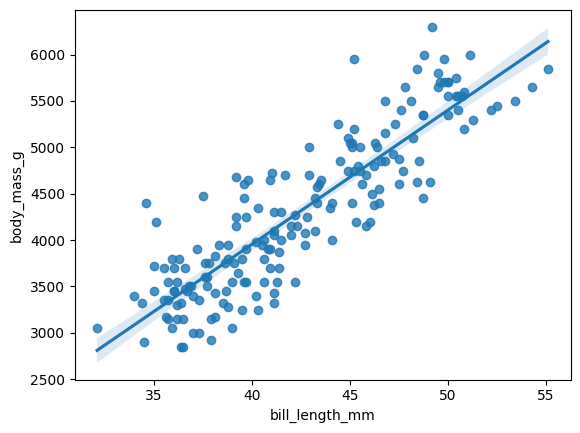

In [54]:
# Plot regression line
sns.regplot(x="bill_length_mm", y="body_mass_g", data=ols_data)

In [55]:
# Get predictions from model
y_pred = ols_model.predict(X_test)

In [56]:
# Calculate residuals
residuals = ols_model.resid

### Assumptions

**Linearity**

Each predictor variable is linearly correlated with the independent variable. If assumption is violated, transform one or both of the variables (e.g. taking the logarithm). 

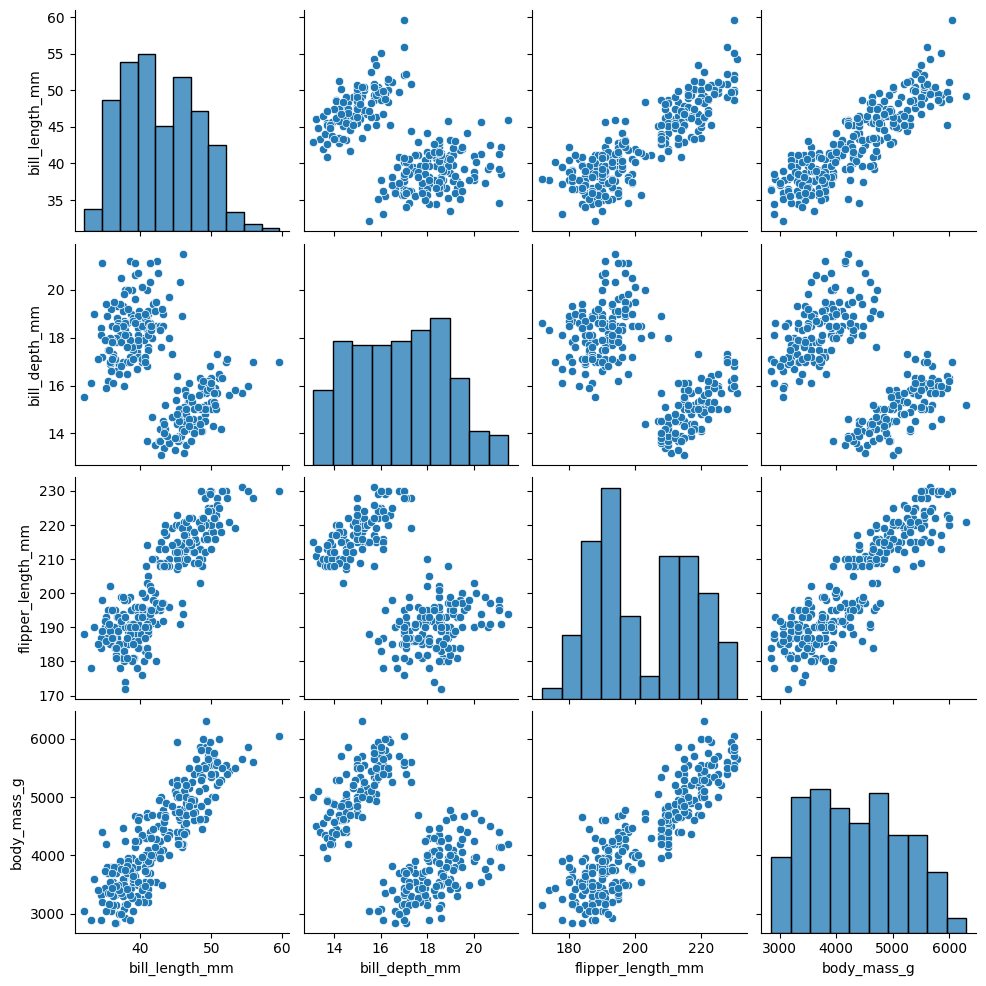

In [57]:
sns.pairplot(df)

**Normality**

Residual values or errors are normally distributed. If assumption is violated, transform one or both variable (e.g. taking the logarithm). 

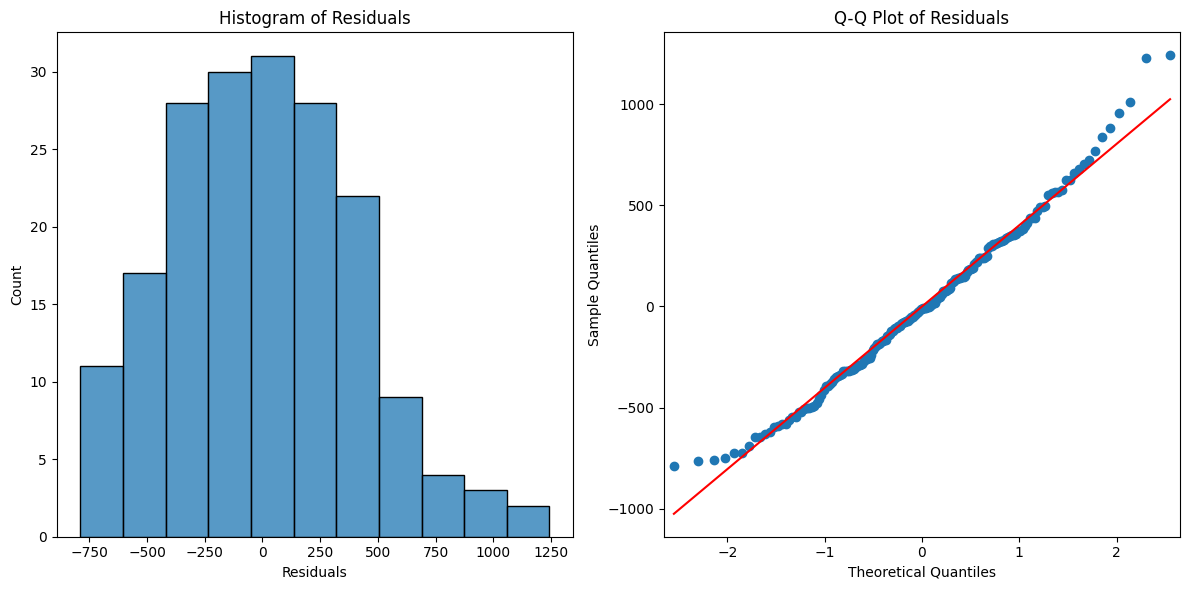

In [58]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

# Histogram
sns.histplot(residuals, ax=ax[0])
ax[0].set_xlabel("Residuals")
ax[0].set_title("Histogram of Residuals")

# Q-Q plot
sm.qqplot(residuals, line="s", ax=ax[1])
ax[1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

**Independent Observation**

Each observation in the dataset is independent. 

**Homoscedasticity**

Variation of the residuals is constant or similar across the model and there is no observable pattern for residuals as compared to fitted values. If assumption is violated, define a different outcome variable or transform the dependent variable. 

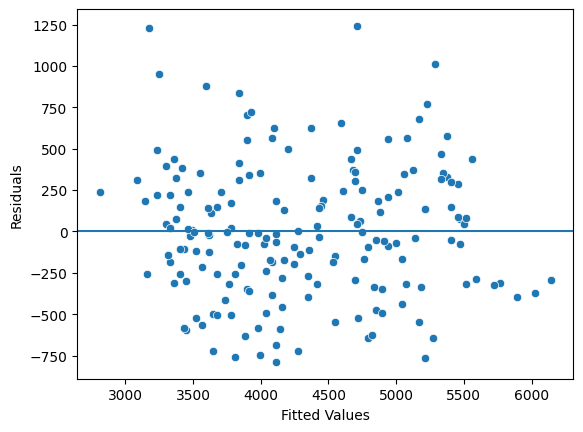

In [59]:
fig = sns.scatterplot(x=ols_model.fittedvalues, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

plt.show()

## Multiple Linear Regression

A technique that estimates the relationship between one continuous dependent variable and two or more independent variables. 

### Model

In [61]:
ols_data = ols_data = df_train[["bill_length_mm", "flipper_length_mm", "sex", "species", "body_mass_g"]]
ols_formula = "body_mass_g ~ bill_length_mm + flipper_length_mm + C(sex) + C(species)"
ols_model = ols(formula=ols_formula, data=ols_data).fit()
ols_summary = ols_model.summary()

#### Variable Selection
- **Forward selection** A stepwise variable selection process that begins with the null model, considers all possible variables to add. It incorporates the independent variable that contributes the most explanatory power to the model.
- **Backward elimination** Begin with the full model, removes the independent variable that adds the least explanatory power to the model. 
- **Extra Sum of Square F Test** Quantifies the difference between the amount of variance that is left unexplained by a reduced model that is explained by the full model

#### Regularisation
Set of regression techniques that shrinks regression coefficient estimates toward zero, adding in bias to reduce variance

### Evaluation

In [62]:
display(ols_summary)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     370.2
Date:                Mon, 27 May 2024   Prob (F-statistic):           1.14e-85
Time:                        07:58:48   Log-Likelihood:                -1303.2
No. Observations:                 185   AIC:                             2616.
Df Residuals:                     180   BIC:                             2632.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -429.8819    698.939     -0.615      0.539   -1809.051     949.287
C(sex)[T.Male]         578.3492     55.678     10.387      0.000     468.483     688.215
C(species)[T.Gentoo]   779.3591    119.124      6.542      0.000     544.300    1014.418
bill_length_mm          24.0909      9.794      2.460      0.015       4.765      43.416
flipper_length_mm       15.2990      3.686      4.150      0.000       8.025      22.573
==============================================================================
Omnibus:                        1.207   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.229
Skew:                           0.192   Prob(JB):                        0.541
Kurtosis:                       2.887   Cond. No.                     7.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Overfitting
When a model fits the observed or training data too specifically and is unable to generate suitable estimates for the general population. 
- Holdout sample (Validation data)
- Adjusted R-squared (Penalise unnecessary additional independent variables)
- Bias variance trade-off
  - High bias: Underfit sample data
  - High variance: Does not perform well on new data

### Assumptions

**No Multicollinearity**

No two independent variables can be highly correlated with each other. The higher the Variance Inflation Factors (VIF), the larger the extent of multicollinearity. 

In [72]:
df_vif_input = df[["bill_length_mm","flipper_length_mm"]]
vif = [variance_inflation_factor(df_vif_input.values, i) for i in range(df_vif_input.shape[1])]
df_vif = pd.DataFrame(vif, index=df_vif_input.columns, columns=['VIF'])

display(df_vif)

,VIF
bill_length_mm,220.351842
flipper_length_mm,220.351842
